In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv')

features = list(df.columns)[0:8]

features


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [2]:
X = df[features]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [3]:
lr = LogisticRegression(random_state=1, max_iter=500)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

test_vals = X_test
test_vals['outcomes'] = y_pred

test_vals

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcomes
210,2,81,60,22,0,27.7,0.290,25,0
340,1,130,70,13,105,25.9,0.472,22,0
649,0,107,60,25,0,26.4,0.133,23,0
477,7,114,76,17,110,23.8,0.466,31,0
432,1,80,74,11,60,30.0,0.527,22,0
...,...,...,...,...,...,...,...,...,...
419,3,129,64,29,115,26.4,0.219,28,0
300,0,167,0,0,0,32.3,0.839,30,1
296,2,146,70,38,360,28.0,0.337,29,0
582,12,121,78,17,0,26.5,0.259,62,0


In [4]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[116,  10],
       [ 35,  31]])

Text(0.5, 1.0, 'confusion matrix for diabetes predicityon model')

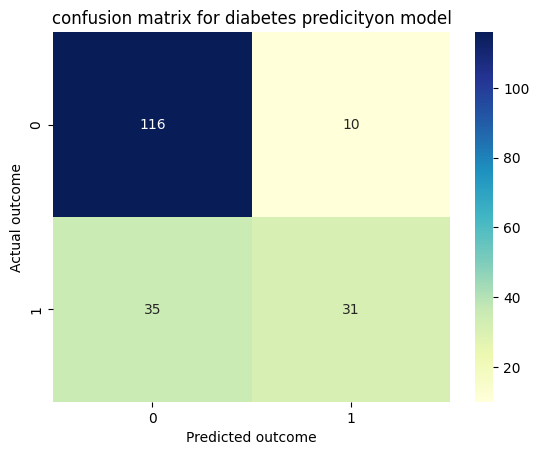

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(data=pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')

plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.title('confusion matrix for diabetes predicityon model')

In [7]:
from sklearn.metrics import classification_report
output_report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

output_report['accuracy']

0.765625

In [27]:
y_pred_proba = (lr.predict_proba(X_test)[::,1]).astype(int)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'{auc}')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- outcomes


In [32]:
import itertools

combinations = []

for i in range(1, 9):
    combs = list(itertools.combinations(features, i))
    combinations.extend(combs)


accuracy = 0 
best_X = 0

for features_set in combinations:

    X = df[list(features_set)]
    y = df['Outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

    lr_iter = LogisticRegression(random_state=1, max_iter=400)

    lr_iter.fit(X_train, y_train)

    y_pred = lr_iter.predict(X_test)

    output_report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

    acc = output_report['accuracy']

    if acc > accuracy:
        accuracy = acc
        best_X = list(features_set)

print(best_X)

print(accuracy)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespa

['Pregnancies', 'Glucose', 'BMI']
0.7760416666666666
